# Model Pruning Experiments

This notebook demonstrates pruning experiments on:
1. Vision Transformer (ViT)
2. Deep Compression AutoEncoder (DC-AE)

In [1]:
# Clone the repository
!git clone https://github.com/tahahah/model-pruning-experiments.git
%cd model-pruning-experiments

# Install dependencies
!pip install -r requirements.txt
!pip install datasets

Cloning into 'model-pruning-experiments'...
remote: Enumerating objects: 244, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 244 (delta 5), reused 11 (delta 5), pack-reused 232 (from 1)
Receiving objects: 100% (244/244), 489.37 KiB | 1.97 MiB/s, done.
Resolving deltas: 100% (142/142), done.
/content/model-pruning-experiments
  Cloning https://github.com/mit-han-lab/efficientvit.git to /tmp/pip-req-build-00zbwel6
  Running command git clone --filter=blob:none --quiet https://github.com/mit-han-lab/efficientvit.git /tmp/pip-req-build-00zbwel6
  Resolved https://github.com/mit-han-lab/efficientvit.git to commit b94ff779828eea399c78f626b574da2d50ef2e49
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/alibaba/TinyNeuralNetwork.git to /tmp/pip-install-vy38cjc2/tinyneuralnetwork_c8abfd8ccdc84672bb7fd7df8556d5f9
  R

## 1. Vision Transformer (ViT) Pruning

In [2]:
%cd model-pruning-experiments

/content/model-pruning-experiments


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Resolving data files:   0%|          | 0/339 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/339 [00:00<?, ?it/s]

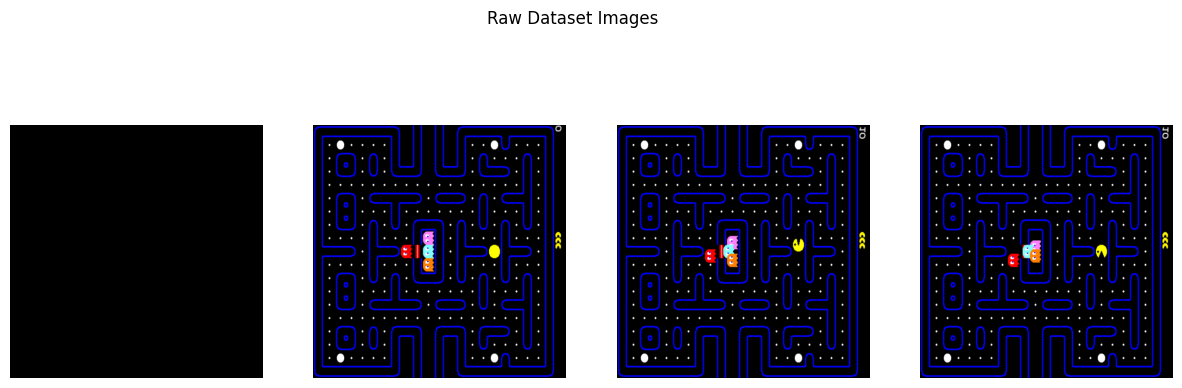

<Figure size 1500x500 with 0 Axes>

In [3]:
import sys
import os
sys.path.append(os.path.abspath('..'))

import torch
import matplotlib.pyplot as plt
from dcaecore.pacman_dataset_copy import PacmanDatasetProviderConfig, SimplePacmanDatasetProvider, StreamingPacmanDataset

plt.rcParams['figure.figsize'] = [15, 5]
# First, let's verify we can get raw images directly from the dataset
cfg = PacmanDatasetProviderConfig()
raw_dataset = StreamingPacmanDataset(cfg, cfg.train_dataset, cfg.train_split)
raw_iter = iter(raw_dataset)

# Get a few raw samples and display them
plt.figure(figsize=(15, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    sample = next(raw_iter)
    # Convert from [-1,1] to [0,1] range
    img = (sample['data'] + 1) / 2
    plt.imshow(img.permute(1, 2, 0))
    plt.axis('off')
plt.suptitle('Raw Dataset Images')
plt.show()
plt.savefig("my_chart.png")

In [41]:
data_provider.train.dataset.dataset.features

{'episode': Value(dtype='int64', id=None),
 'frame_image': Image(mode=None, decode=True, id=None),
 'action': Value(dtype='int64', id=None),
 'next_frame_image': Image(mode=None, decode=True, id=None),
 'done': Value(dtype='bool', id=None)}

In [ ]:
# Show multiple batches to see streaming behavior
print("Showing 3 consecutive batches from training dataset...")
for _ in range(3):
    train_batch = next(iter(data_provider.train))
    show_batch(train_batch, f'Training Batch {_+1}')
    plt.show()

In [ ]:
from vit_pruning_analysis import *

# Run ViT pruning analysis
main()

## 2. DC-AE Pruning

In [ ]:
!git stash && git pull

Saved working directory and index state WIP on master: 74f3dfa fix: incorrect import utils
Already up to date.


In [7]:
!python vae_pruning_analysis.py

Loading DC-AE model...
Using device: cuda

Analyzing original model...

Model Sparsity Analysis:
Total Parameters: 323,105,472
Non-zero Parameters: 323,105,472 (100.0%)
Zero Parameters: 0 (0.0%)

Top 10 Most Sparse Layers:
                                                                      Layer     Size  NonZero  Sparsity(%)
125                          decoder.project_out.op_list.2.conv.conv.weight    27648    27648          0.0
0                                       encoder.project_in.conv.conv.weight     1728     1728          0.0
1                         encoder.stages.1.op_list.0.main.conv1.conv.weight   589824   589824          0.0
2                         encoder.stages.1.op_list.0.main.conv2.conv.weight   589824   589824          0.0
3                         encoder.stages.1.op_list.1.main.conv1.conv.weight   589824   589824          0.0
4                         encoder.stages.1.op_list.1.main.conv2.conv.weight   589824   589824          0.0
110          decoder.stages.

## 3. Finetuning DC AE

In [2]:
!pip install datasets
!wandb login

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: h

In [43]:
!git reset --hard && git pull


HEAD is now at 73c4a62 hardcode dataset len
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 7 (delta 5), reused 7 (delta 5), pack-reused 0 (from 0)
Unpacking objects: 100% (7/7), 838 bytes | 419.00 KiB/s, done.
From https://github.com/tahahah/model-pruning-experiments
   73c4a62..70b1e68  master     -> origin/master
Updating 73c4a62..70b1e68
Fast-forward
 dcaecore/config.yaml            |  3 ++-
 dcaecore/pacman_dataset_copy.py |  2 ++
 dcaecore/trainer.py             | 10 ++++++++--
 iterative_prune_retrain.py      |  2 +-
 4 files changed, 13 insertions(+), 4 deletions(-)


In [4]:
import os

os.environ["RANK"] = "0"
os.environ["WORLD_SIZE"] = "1"
os.environ["LOCAL_RANK"] = "0"
os.environ["MASTER_ADDR"] = "localhost"
os.environ["MASTER_PORT"] = "29500"

In [6]:
!python dcaecore/train_dc_ae.py --config dcaecore/config.yaml --pretrained "mit-han-lab/dc-ae-f32c32-in-1.0" --output_dir dcaecore/outputs --gpu 0

Resolving data files: 100% 339/339 [00:00<00:00, 2772.26it/s]
Resolving data files: 100% 339/339 [00:00<00:00, 22476.59it/s]
Resolving data files: 100% 339/339 [00:00<00:00, 33528.32it/s]
Resolving data files: 100% 339/339 [00:00<00:00, 514424.41it/s]
2025-02-13 14:04:23,417 - dcae_training - INFO - Set random seed to 42
wandb: Currently logged in as: tahaa to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Tracking run with wandb version 0.19.6
wandb: Run data is saved locally in /content/model-pruning-experiments/wandb/run-20250213_140423-p8tyw0ou
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run true-flower-19
wandb: ⭐️ View project at https://wandb.ai/tahaa/dcae-finetuning
wandb: 🚀 View run at https://wandb.ai/tahaa/dcae-finetuning/runs/p8tyw0ou
2025-02-13 14:04:24,479 - dcae_training - INFO - Initialized Weights & Biases logging


## 4. Interactive Pruning

In [ ]:
!python iterative_prune_retrain.py --config dcaecore/config.yaml --model_path "mit-han-lab/dc-ae-f32c32-in-1.0" --save_dir ./pruned_models --gpu 0

Resolving data files: 100% 339/339 [00:00<00:00, 1177.68it/s]
Resolving data files: 100% 339/339 [00:00<00:00, 304664.46it/s]
Resolving data files: 100% 339/339 [00:00<00:00, 527008.55it/s]
Resolving data files: 100% 339/339 [00:00<00:00, 33239.10it/s]
2025-02-13 15:20:22,686 - dcae_training - INFO - 
=== Starting iteration 1 ===
2025-02-13 15:20:22,687 - dcae_training - INFO - Current model statistics:

Model Sparsity Analysis:
Total Parameters: 323,105,472
Non-zero Parameters: 323,105,472 (100.0%)
Zero Parameters: 0 (0.0%)

Top 10 Most Sparse Layers:
                                                                      Layer     Size  NonZero  Sparsity(%)
125                          decoder.project_out.op_list.2.conv.conv.weight    27648    27648          0.0
0                                       encoder.project_in.conv.conv.weight     1728     1728          0.0
1                         encoder.stages.1.op_list.0.main.conv1.conv.weight   589824   589824          0.0
2            

In [31]:
!rm -rf ./pruned_models
!mkdir ./pruned_models

## View Results

The results are saved in the `output` directory:
- Pruning analysis reports
- Reconstructed images
- Model statistics